In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import pyplot
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import os

In [3]:
os.chdir("D://BIT_study_related//Thesis//Data_Monthly")

In [3]:
!dir

 Volume in drive D is Seagate Backup Plus Drive
 Volume Serial Number is 5059-4187

 Directory of D:\BIT_study_related\Thesis\Data_Monthly

05/08/2023  01:54 PM    <DIR>          .
05/06/2023  03:22 PM    <DIR>          ..
05/08/2023  10:18 AM    <DIR>          .ipynb_checkpoints
05/01/2023  01:49 PM         5,322,673 2015_Winter.tif
05/01/2023  04:12 PM           310,757 2015_Winter.tif.aux.xml
05/08/2023  01:05 PM             2,394 CO2_date_index - Copy.csv
05/08/2023  12:55 PM             2,110 CO2_date_index.csv
05/08/2023  01:35 PM         1,661,521 CO2_TimeSeries.ipynb
05/08/2023  10:10 AM           243,572 CO2_Time_Series_forecasting_RNN-LSTM.ipynb
04/18/2023  07:07 AM             5,494 CO2_values.csv
05/08/2023  01:25 PM             1,993 detrended.csv
05/01/2023  07:50 PM    <DIR>          DINCAE
05/01/2023  11:21 AM    <DIR>          DINEOF
05/01/2023  11:22 AM    <DIR>          Dineof_Output
05/01/2023  02:50 PM    <DIR>          Dineof_Output - Copy
05/01/2023  04:11 PM    

In [22]:
df_concat = pd.concat([pd.read_csv('SIF-2_19.csv'),pd.read_csv('SIF-3_19.csv')], ignore_index=True)
df_concat.drop(df_concat.columns[[0]], axis=1, inplace=True)
df_concat.to_csv('D:\\BIT_study_related\\Thesis\\Data_Monthly\\SIF2&3\\SIF-2&3_19.csv')
df_concat

,Latitude,Longitude,Daily_SIF757nm,Daily_SIF771nm,year,Month,Day,temperature_two_meter,vapor_pressure_deficit,wind_speed,SIF_quality_flag
0,8.246765,77.849850,-0.200650,0.074754,2019,10,1,302.39807,1414.55250,3.144642,2
1,8.265503,77.845580,0.355458,0.089343,2019,10,1,302.25656,1406.70340,3.129880,0
2,8.254822,77.843994,0.134630,-0.008305,2019,10,1,302.36110,1415.59690,3.134963,1
3,8.244080,77.842350,-0.134754,0.001304,2019,10,1,302.39070,1410.81500,3.140066,2
4,8.284241,77.841250,0.186886,0.073759,2019,10,1,302.37430,1445.81470,3.115543,0
...,...,...,...,...,...,...,...,...,...,...,...
497022,20.211609,86.573490,-0.258785,-0.165358,2019,9,9,302.19830,733.76807,6.675051,2
497023,20.220642,86.586365,-0.338722,-0.282855,2019,9,9,302.19470,732.30710,6.672487,2
497024,20.229614,86.599180,-0.034912,-0.243736,2019,9,9,302.21400,733.84717,6.670089,2
497025,20.238708,86.612060,-0.217454,-0.563877,2019,9,9,302.22226,733.89355,6.667826,2


## Seasonal Decomposition

In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
df=pd.read_csv('CO2_values.csv')
df.tail()

,Months,maximum,mean,minimum,pixelcount,stddev
86,CO2_2022_10,422.628480,413.995709,393.186280,2449,2.010139
87,CO2_2022_11,424.235320,416.944042,399.066735,2012,3.468831
88,CO2_2022_12,424.211195,417.970509,408.611910,2749,1.059770
89,CO2_2023_1,425.904100,418.375288,406.003500,4879,1.740759
90,CO2_2023_2,420.877004,418.269817,410.511800,681,0.946474


In [5]:
df.loc[:,'Months'] = df['Months'].str.slice(4,)
df['Months'].tail()

86    2022_10
87    2022_11
88    2022_12
89     2023_1
90     2023_2
Name: Months, dtype: object

In [6]:
df.loc[:,'Months'] = df['Months'].str.replace('_', '-')
df.tail()

,Months,maximum,mean,minimum,pixelcount,stddev
86,2022-10,422.628480,413.995709,393.186280,2449,2.010139
87,2022-11,424.235320,416.944042,399.066735,2012,3.468831
88,2022-12,424.211195,417.970509,408.611910,2749,1.059770
89,2023-1,425.904100,418.375288,406.003500,4879,1.740759
90,2023-2,420.877004,418.269817,410.511800,681,0.946474


In [7]:
df = df.loc[:,['Months','mean','stddev','pixelcount']]
df

,Months,mean,stddev,pixelcount
0,2014-11,395.637395,1.645495,698
1,2014-12,397.559220,2.532339,541
2,2015-1,397.419025,0.657779,447
3,2015-2,398.980959,0.967656,1159
4,2015-3,399.970865,1.838570,457
...,...,...,...,...
86,2022-10,413.995709,2.010139,2449
87,2022-11,416.944042,3.468831,2012
88,2022-12,417.970509,1.059770,2749
89,2023-1,418.375288,1.740759,4879


In [8]:
df.to_csv('D:\\BIT_study_related\\Thesis\\Data_Monthly\\CO2_date_index.csv')

In [9]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
df = pd.read_csv('CO2_date_index.csv',parse_dates=['Months'], date_parser=dateparse)
print ('\n Parsed Data:')
print (df.head())


 Parsed Data:
   Unnamed: 0     Months        mean    stddev  pixelcount
0           0 2014-11-01  395.637395  1.645495         698
1           1 2014-12-01  397.559220  2.532339         541
2           2 2015-01-01  397.419025  0.657779         447
3           3 2015-02-01  398.980959  0.967656        1159
4           4 2015-03-01  399.970865  1.838570         457


C:\Users\shrey\AppData\Local\Temp\ipykernel_3068\4016964971.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')


In [10]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df['year'] = df['Months'].dt.year
df

,Months,mean,stddev,pixelcount,year
0,2014-11-01,395.637395,1.645495,698,2014
1,2014-12-01,397.559220,2.532339,541,2014
2,2015-01-01,397.419025,0.657779,447,2015
3,2015-02-01,398.980959,0.967656,1159,2015
4,2015-03-01,399.970865,1.838570,457,2015
...,...,...,...,...,...
86,2022-10-01,413.995709,2.010139,2449,2022
87,2022-11-01,416.944042,3.468831,2012,2022
88,2022-12-01,417.970509,1.059770,2749,2022
89,2023-01-01,418.375288,1.740759,4879,2023


<Axes: xlabel='Months'>

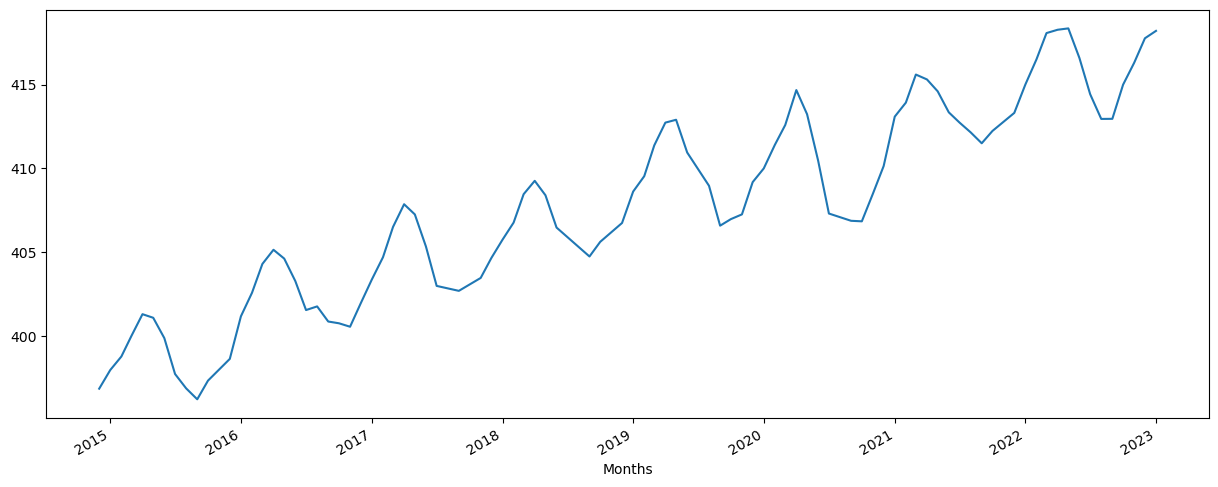

In [15]:
# Compute rolling mean with window size 3
rolling_mean = df['mean'].rolling(window=3, center=True).mean()

<Axes: xlabel='Months'>

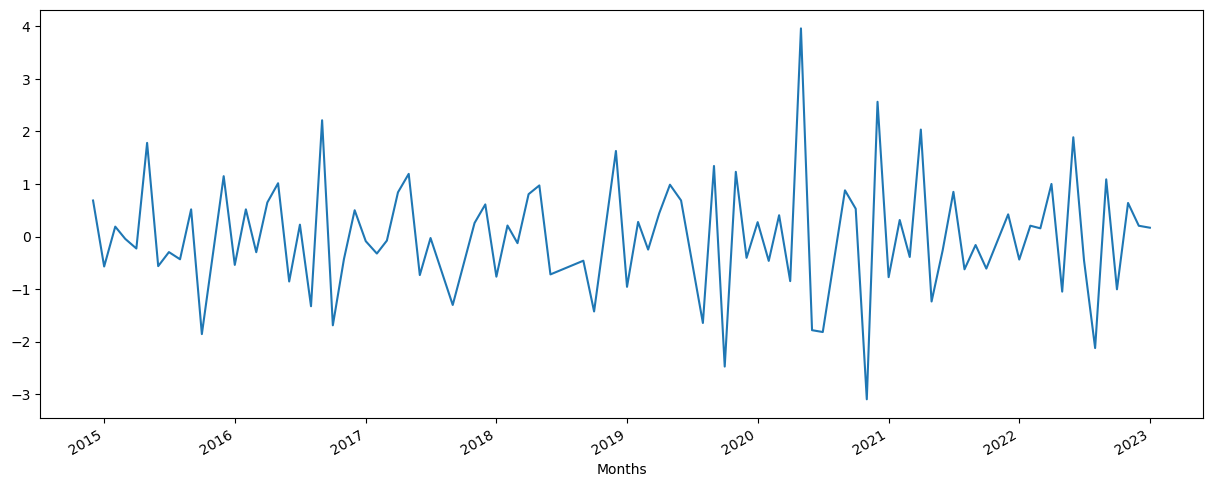

In [16]:
# Subtract rolling mean from original data to remove trend
detrended = df['mean'] - rolling_mean
detrended.plot()

In [17]:
detrended.to_csv('D:\\BIT_study_related\\Thesis\\Data_Monthly\\detrended.csv')

<Axes: xlabel='Months'>

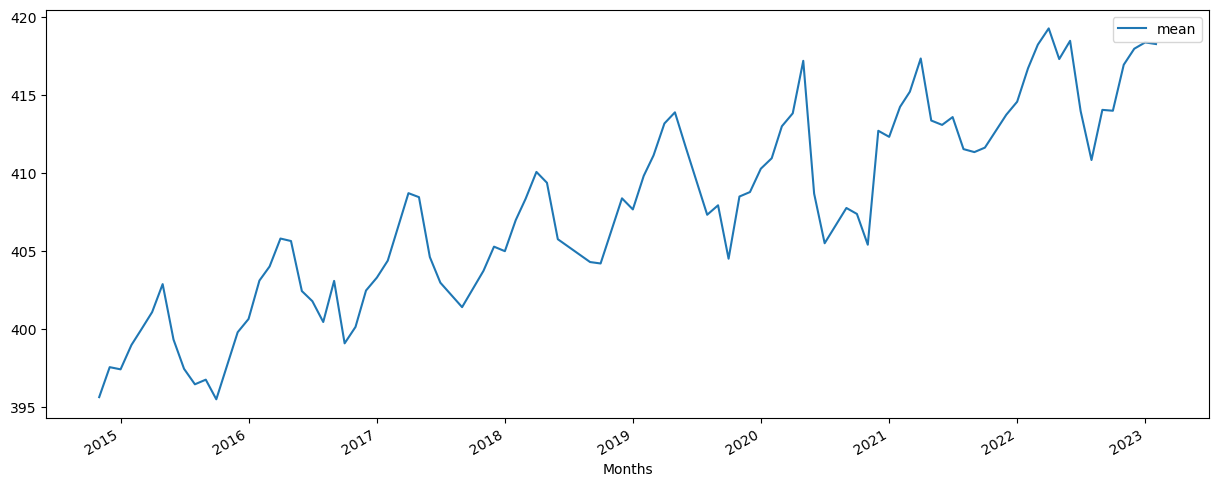

In [12]:
df.dropna(inplace=True)
df.plot()

In [13]:
result=seasonal_decompose(df, model='multiplicable', period = 12)

<Axes: xlabel='Months'>

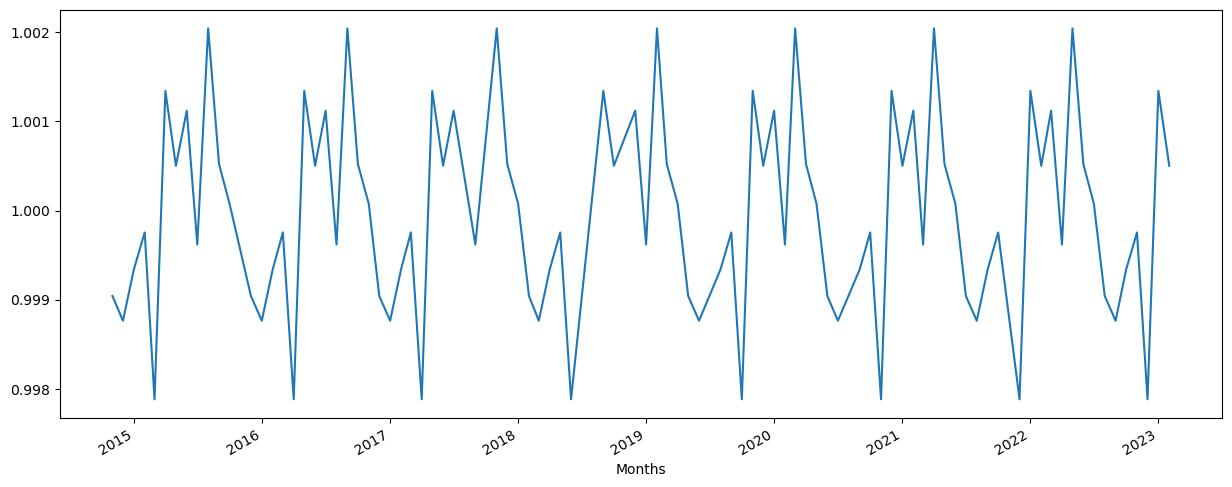

In [14]:
result.seasonal.plot()

<Axes: xlabel='Months'>

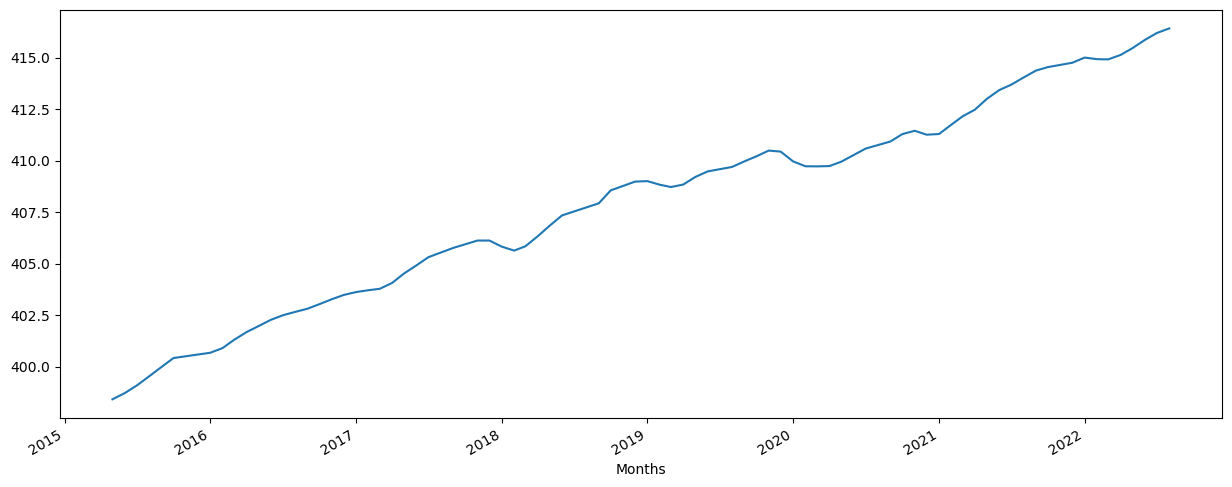

In [29]:
result.trend.plot()

<Axes: xlabel='Months'>

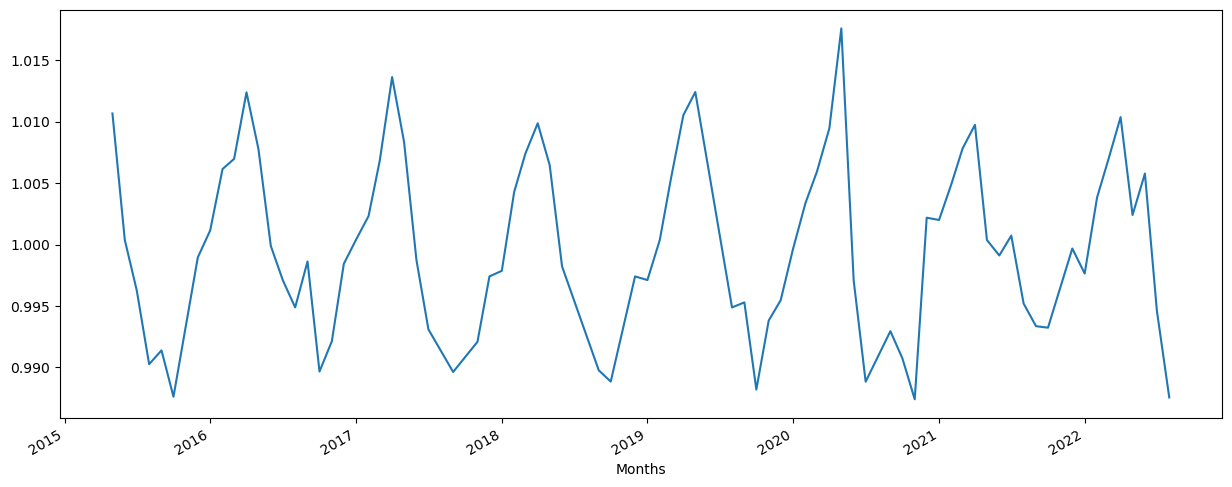

In [30]:
result.resid.plot()

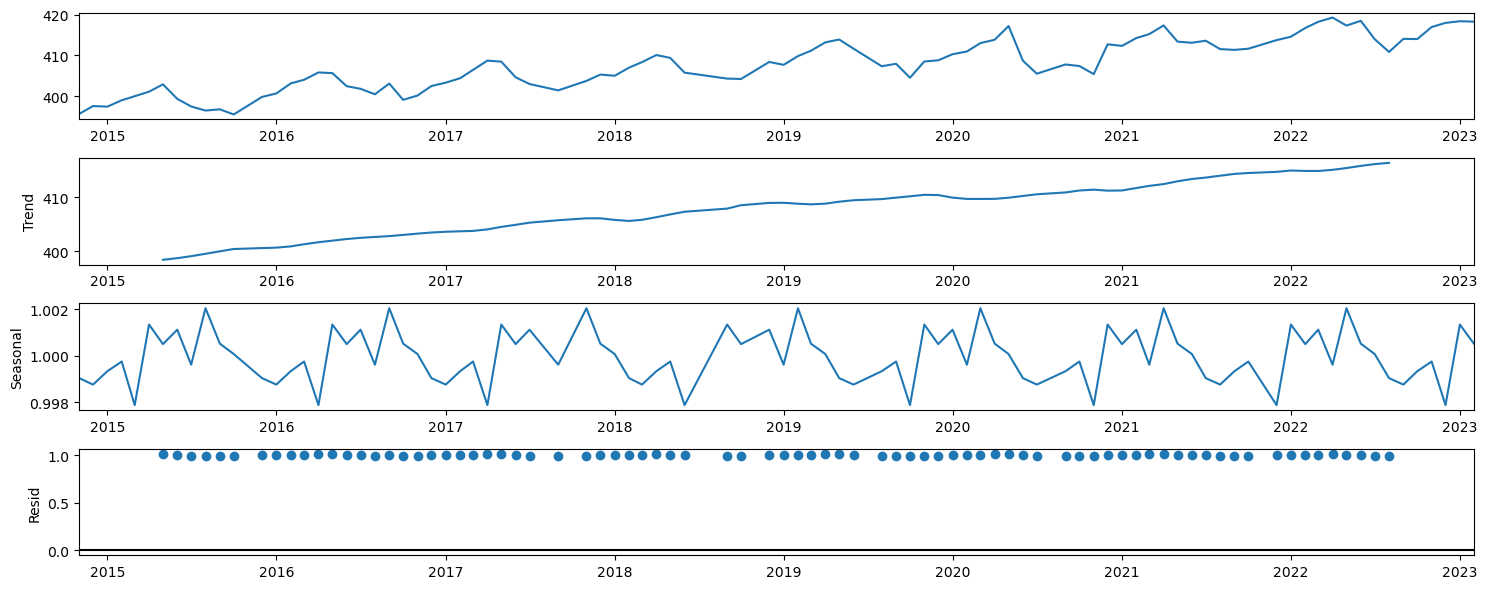

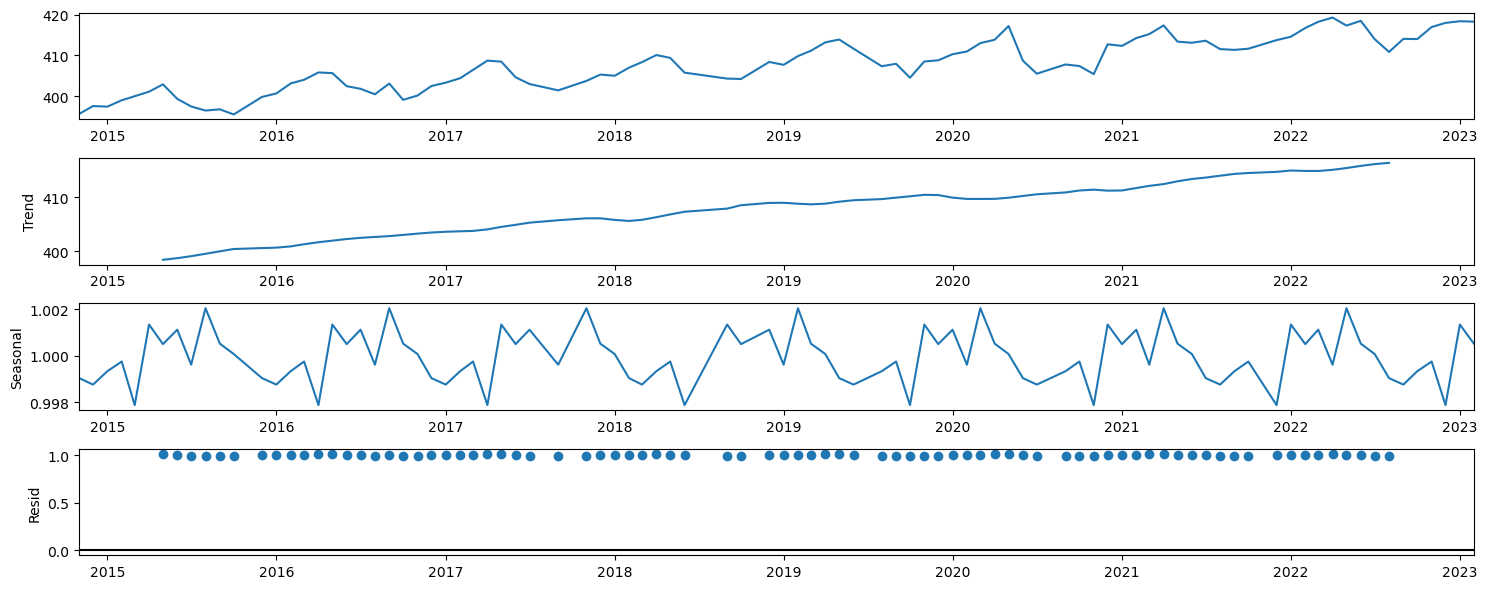

In [15]:
result.plot()

In [32]:
print(result.seasonal)

Months
2014-11-01    0.999042
2014-12-01    0.998765
2015-01-01    0.999338
2015-02-01    0.999754
2015-03-01    0.997884
                ...   
2022-10-01    0.999338
2022-11-01    0.999754
2022-12-01    0.997884
2023-01-01    1.001341
2023-02-01    1.000501
Name: seasonal, Length: 91, dtype: float64


In [33]:
print(result.resid.dropna())

Months
2015-05-01    1.010678
2015-06-01    1.000381
2015-07-01    0.996268
2015-08-01    0.990268
2015-09-01    0.991393
                ...   
2022-04-01    1.010382
2022-05-01    1.002412
2022-06-01    1.005787
2022-07-01    0.994614
2022-08-01    0.987560
Name: resid, Length: 79, dtype: float64


In [34]:
type(result)

statsmodels.tsa.seasonal.DecomposeResult

In [16]:
#Convert to timeseries
ts = df['mean']
ts.head(10)

Months
2014-11-01    395.637395
2014-12-01    397.559220
2015-01-01    397.419025
2015-02-01    398.980959
2015-03-01    399.970865
2015-04-01    401.088489
2015-05-01    402.882370
2015-06-01    399.326982
2015-07-01    397.453181
2015-08-01    396.460217
Name: mean, dtype: float64

# ARIMA Model

In [17]:
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df

Shape of data (91, 1)


,mean
Months,
2014-11-01,395.637395
2014-12-01,397.559220
2015-01-01,397.419025
2015-02-01,398.980959
2015-03-01,399.970865
...,...
2022-10-01,413.995709
2022-11-01,416.944042
2022-12-01,417.970509


In [18]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

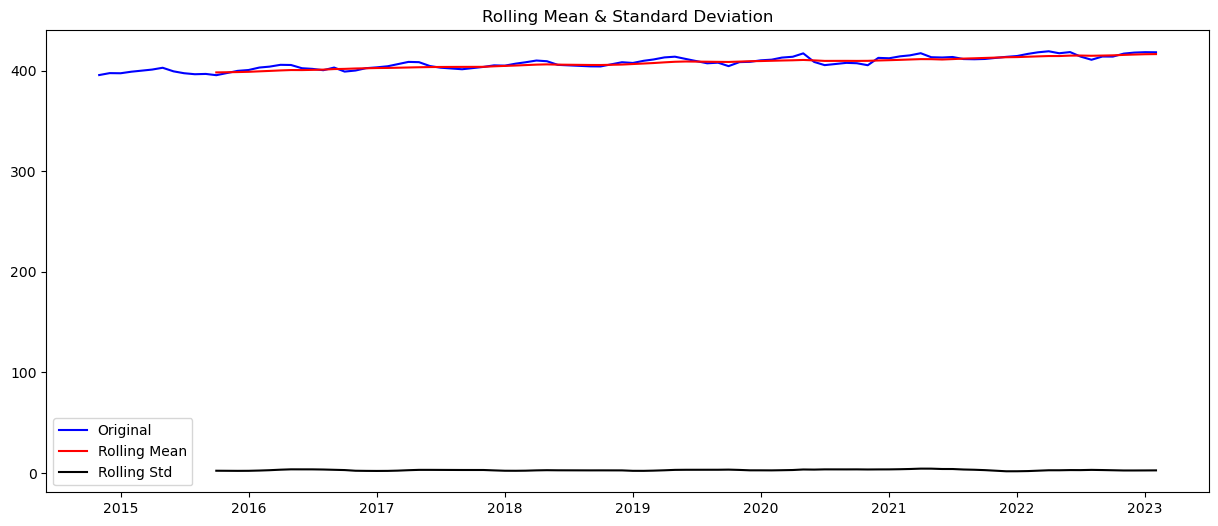

Results of Dickey-Fuller Test:
Test Statistic                 -1.018659
p-value                         0.746398
#Lags Used                      9.000000
Number of Observations Used    81.000000
Critical Value (1%)            -3.513790
Critical Value (5%)            -2.897943
Critical Value (10%)           -2.586191
dtype: float64


In [19]:
test_stationarity(ts)

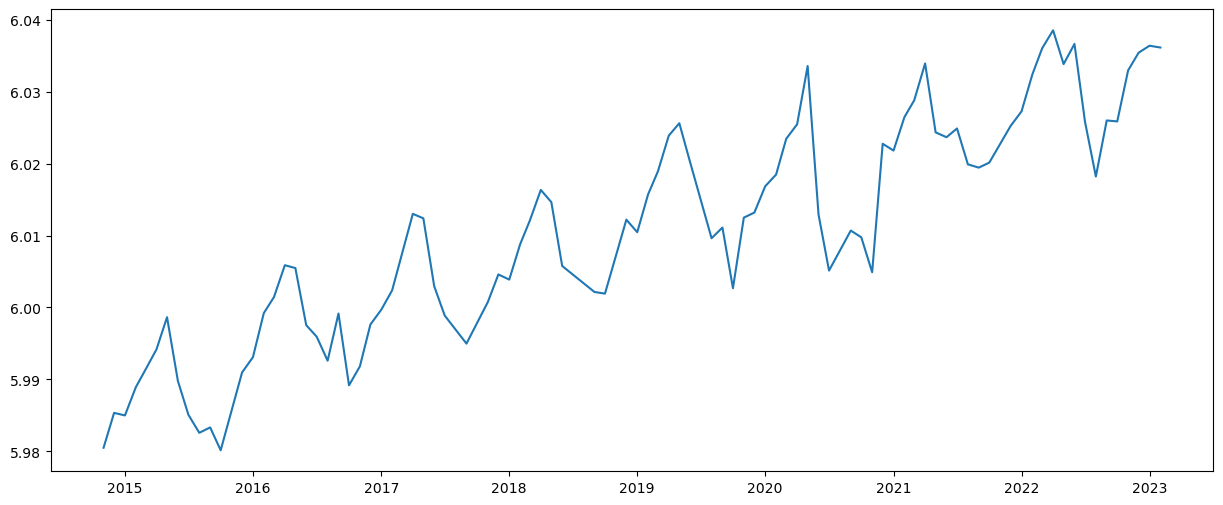

In [20]:
ts_log = np.log(ts)
plt.plot(ts_log)

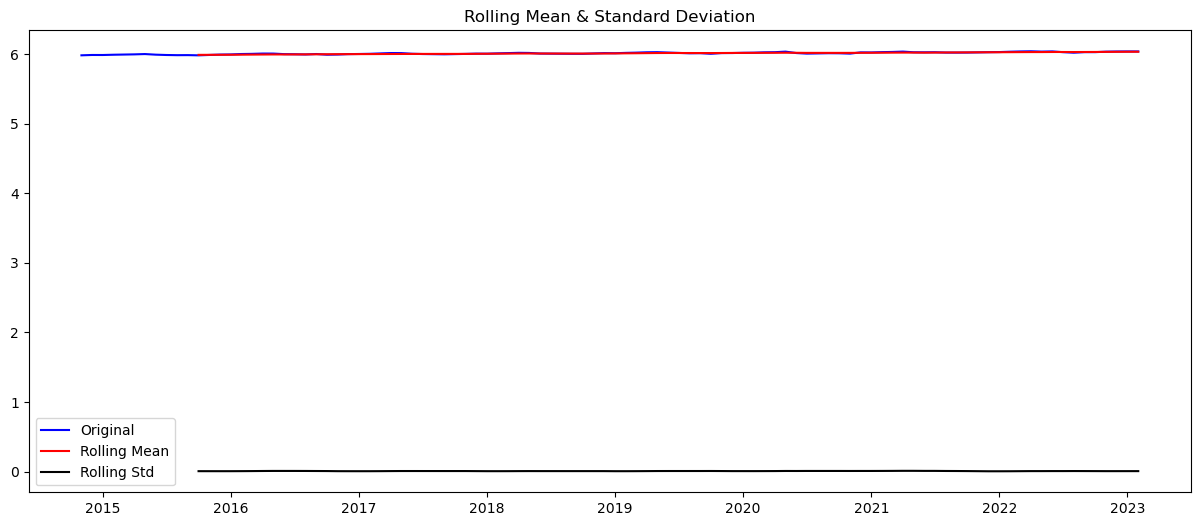

Results of Dickey-Fuller Test:
Test Statistic                 -1.087608
p-value                         0.719988
#Lags Used                      9.000000
Number of Observations Used    81.000000
Critical Value (1%)            -3.513790
Critical Value (5%)            -2.897943
Critical Value (10%)           -2.586191
dtype: float64


In [21]:
test_stationarity(ts_log)

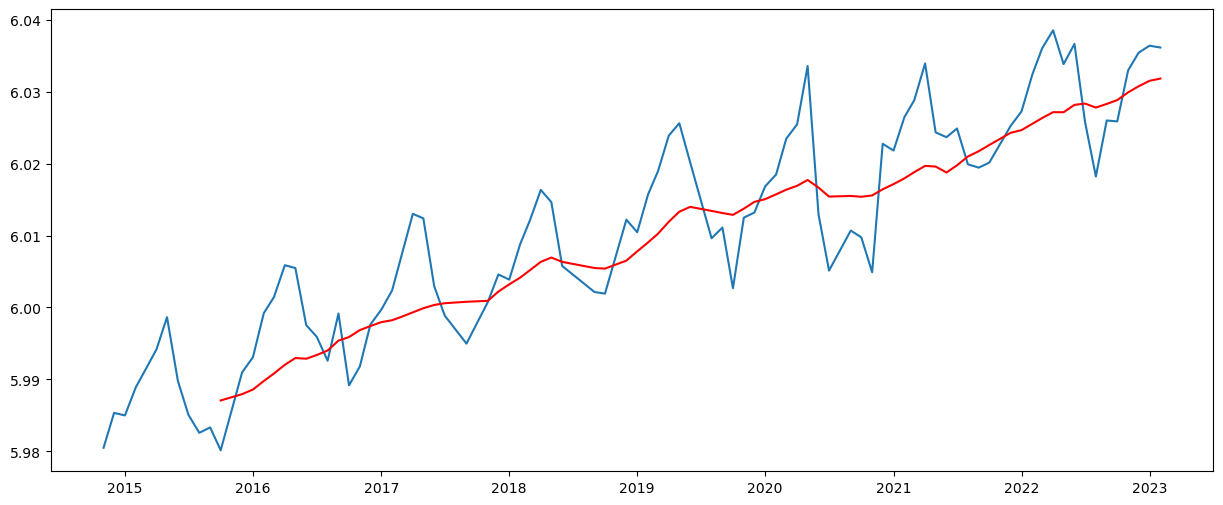

In [22]:
#Smoothing
moving_avg = pd.Series(ts_log).rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [23]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(5)

Months
2014-11-01   NaN
2014-12-01   NaN
2015-01-01   NaN
2015-02-01   NaN
2015-03-01   NaN
Name: mean, dtype: float64

In [24]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head(5)

Months
2015-10-01   -0.006925
2015-12-01    0.003017
2016-01-01    0.004496
2016-02-01    0.009434
2016-03-01    0.010627
Name: mean, dtype: float64

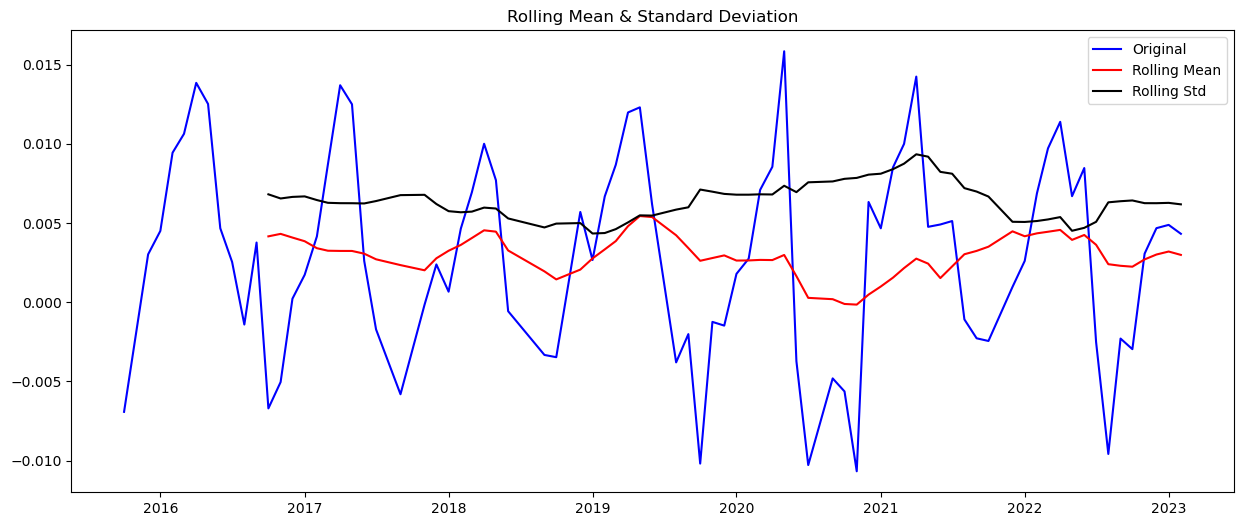

Results of Dickey-Fuller Test:
Test Statistic                -6.046055e+00
p-value                        1.311075e-07
#Lags Used                     6.000000e+00
Number of Observations Used    7.300000e+01
Critical Value (1%)           -3.523284e+00
Critical Value (5%)           -2.902031e+00
Critical Value (10%)          -2.588371e+00
dtype: float64


In [25]:
#TEST STATIONARITY AGAIN
test_stationarity(ts_log_moving_avg_diff)

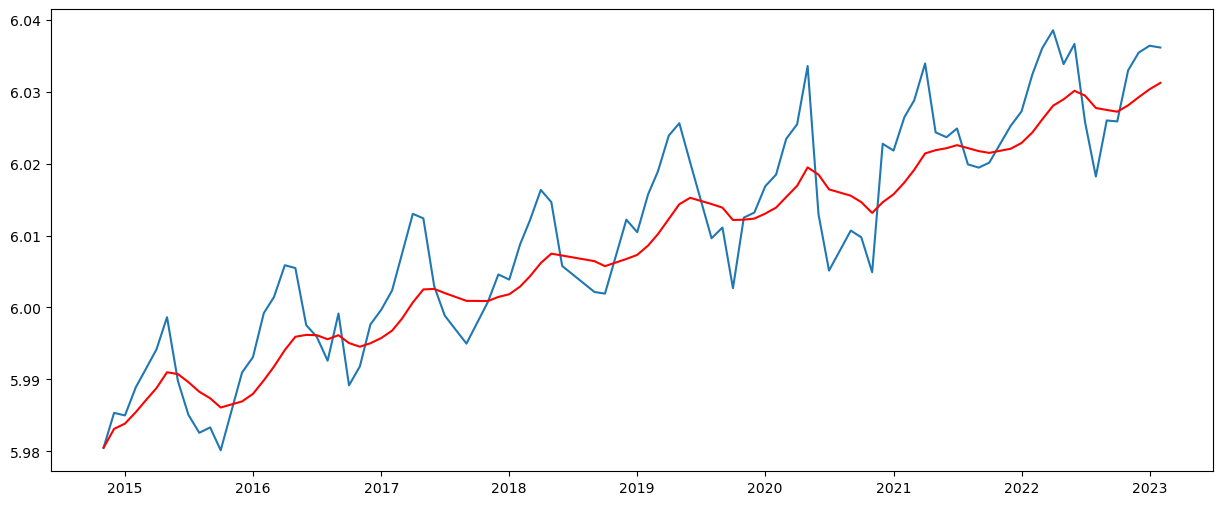

In [26]:
expwighted_avg = ts_log.ewm(span=12).mean() 
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

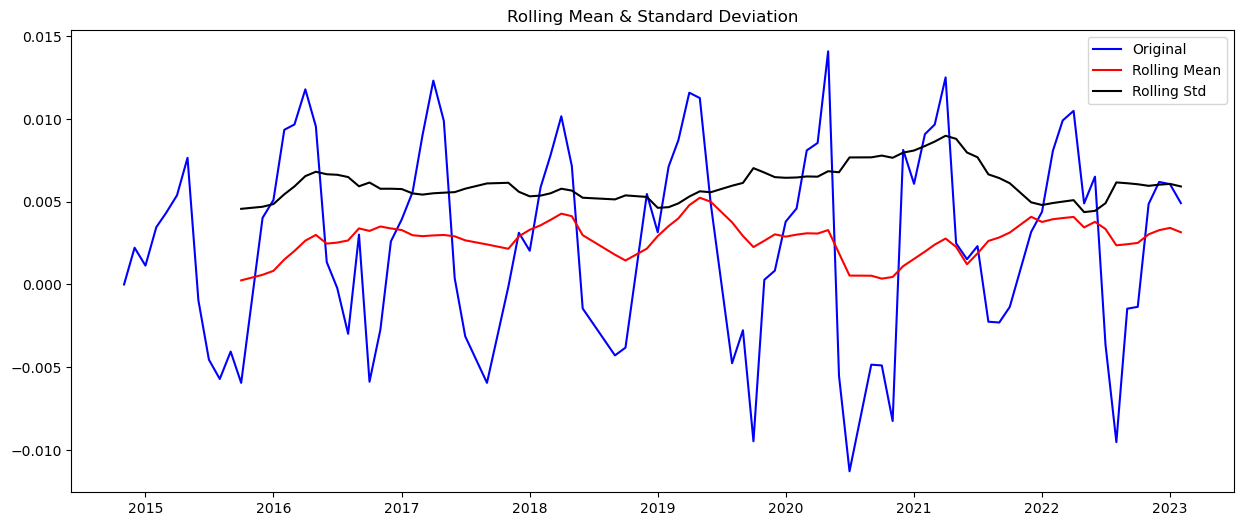

Results of Dickey-Fuller Test:
Test Statistic                -6.728282e+00
p-value                        3.346115e-09
#Lags Used                     6.000000e+00
Number of Observations Used    8.400000e+01
Critical Value (1%)           -3.510712e+00
Critical Value (5%)           -2.896616e+00
Critical Value (10%)          -2.585482e+00
dtype: float64


In [27]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

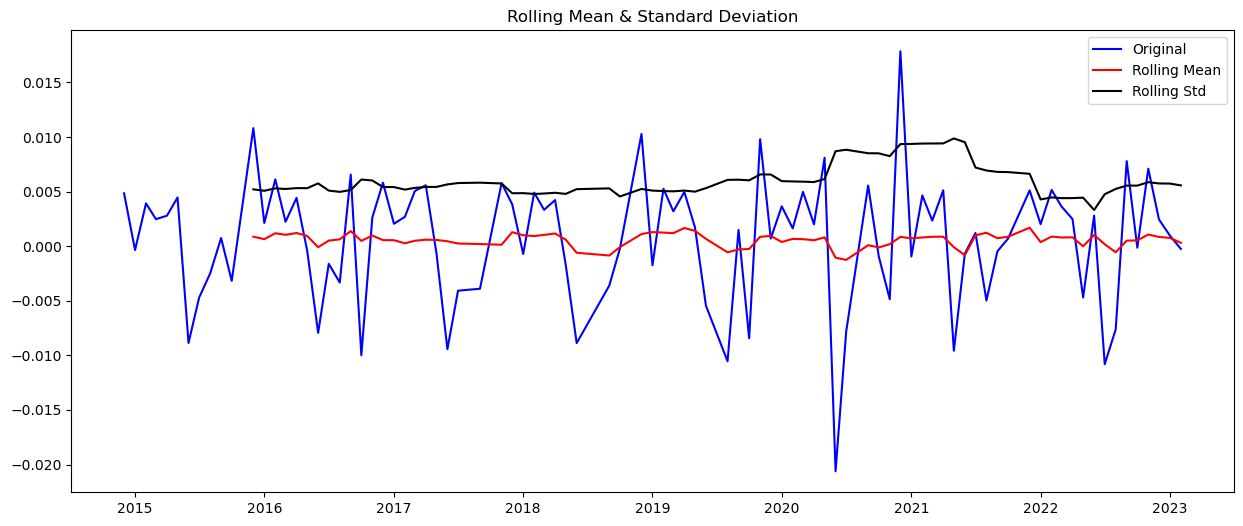

Results of Dickey-Fuller Test:
Test Statistic                -8.016722e+00
p-value                        2.129120e-12
#Lags Used                     8.000000e+00
Number of Observations Used    8.100000e+01
Critical Value (1%)           -3.513790e+00
Critical Value (5%)           -2.897943e+00
Critical Value (10%)          -2.586191e+00
dtype: float64


In [28]:
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [29]:
#DECOMPOSITION
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,period=12)

In [43]:
#FINAL FORECASTING
from statsmodels.tsa.arima_model import ARIMA
ts_values=ts_log.values
X = ts_values
size = int(len(X) * 0.667)
train, test = X[0:size], X[size:len(X)]

In [44]:
#MODEL BUILDING
#training will be 66%, test will be 33% as per our model
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from numpy.linalg import LinAlgError
import warnings
warnings.filterwarnings("ignore")

In [45]:
history = [x for x in train]
predictions = list()
#test.reset_index()

In [51]:
for t in range(len(test)):
    try:
        model = ARIMA(history, order=(4,1,2))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    except (ValueError, LinAlgError):
        pass
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
rmse = mean_squared_error(test, predictions)**0.5
print('Test MSE: %.3f' % rmse)

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


Text(0.5, 1.0, 'Autocorrelation Function')

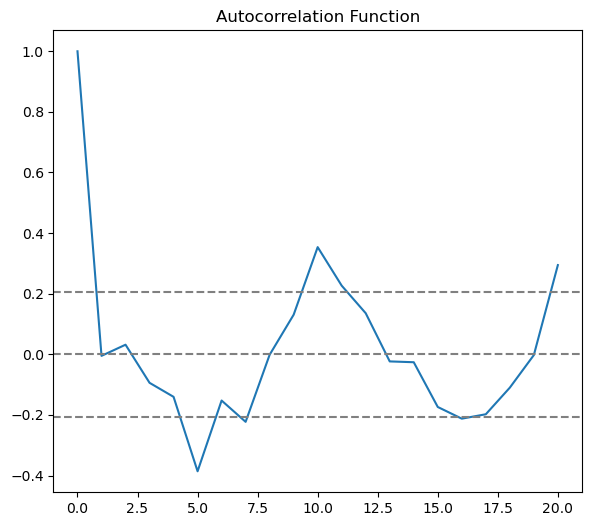

In [49]:
#ACF/PACF PLOTS

#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf 
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')
#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

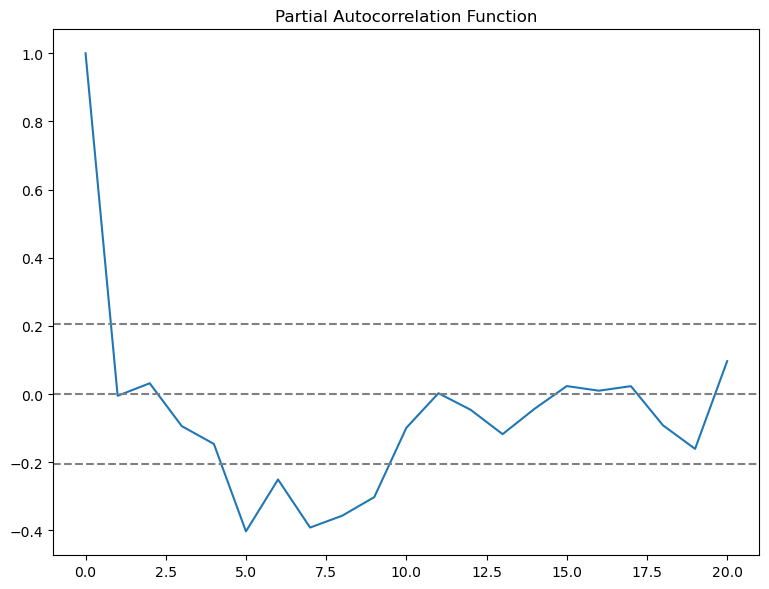

In [50]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [37]:
import warnings
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [38]:
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.8)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

In [39]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [40]:
# load dataset
def parser(x):
	return datetime.strptime('200'+x, '%Y-%m')

In [42]:
import datetime
print(datetime.datetime.now())
p_values = [0,1,2,3,4,5,6]
d_values = [0,1,2]
q_values = [0,1,2,3,4,5]
warnings.filterwarnings("ignore")
evaluate_models(train, p_values, d_values, q_values)
print(datetime.datetime.now())

2023-05-07 23:49:27.501814
Best ARIMANone MSE=inf
2023-05-07 23:49:27.503653


In [47]:
from pmdarima.arima import auto_arima
arima_model = auto_arima(train, start_p=1, start_q=1, d=1, max_p=4, max_q=4, start_P=1, 
                         D=None, start_Q=1, max_P=4, max_D=1, max_Q=4, max_order=5, m=1, 
                         seasonal=True, stationary=False, information_criterion='aic', 
                         alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, 
                         n_jobs=1, start_params=None, trend=None, method='lbfgs', 
                         maxiter=50, offset_test_args=None, seasonal_test_args=None, 
                         suppress_warnings=True, error_action='trace', trace=False, 
                         random=False, random_state=None, n_fits=10, 
                         return_valid_fits=False, out_of_sample_size=0, 
                         scoring='mse', scoring_args=None, with_intercept='auto', 
                         sarimax_kwargs=None)

In [48]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 226.198
Date:                Sun, 07 May 2023   AIC                           -450.395
Time:                        23:51:51   BIC                           -448.318
Sample:                             0   HQIC                          -449.584
                                 - 60                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.738e-05   6.09e-06      4.496      0.000    1.54e-05    3.93e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                 2.71
Prob(Q):                              0.53   Prob(JB):                         0.26
Heteroskedasticity (H):               1.52   Skew:                            -0.50
Prob(H) (two-sided):                  0.35   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Previous code

In [29]:
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(result.seasonal)

1. ADF :  -58025830034312.81
2. P-Value :  0.0
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 78
5. Critical Values :
	 1% :  -3.517113604831504
	 5% :  -2.8993754262546574
	 10% :  -2.5869547797501644


In [30]:
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(result.resid.dropna())

1. ADF :  -6.800558815182035
2. P-Value :  2.2427426097578014e-09
3. Num Of Lags :  7
4. Num Of Observations Used For ADF Regression: 71
5. Critical Values :
	 1% :  -3.526004646825607
	 5% :  -2.9032002348069774
	 10% :  -2.5889948363419957


<AxesSubplot:>

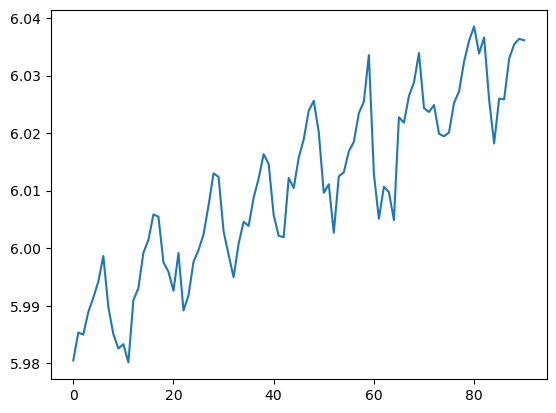

In [49]:
ts_log = np.log(df['mean'])
ts_log.plot()

In [50]:
ts_log.dropna(inplace=True)
ts_log

0     5.980498
1     5.985344
2     5.984991
3     5.988914
4     5.991392
        ...   
86    6.025856
87    6.032952
88    6.035411
89    6.036379
90    6.036127
Name: mean, Length: 91, dtype: float64

# Log transformed

In [51]:
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(ts_log)

1. ADF :  -1.0876081153374444
2. P-Value :  0.7199882617397173
3. Num Of Lags :  9
4. Num Of Observations Used For ADF Regression: 81
5. Critical Values :
	 1% :  -3.5137900174243235
	 5% :  -2.8979433868293945
	 10% :  -2.5861907285474777


<AxesSubplot:>

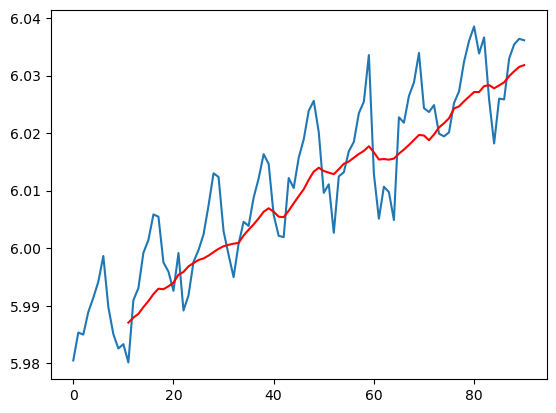

In [58]:
moving_avg = pd.Series(ts_log).rolling(window=12).mean()
ts_log.plot()
moving_avg.plot(color='red')

<AxesSubplot:>

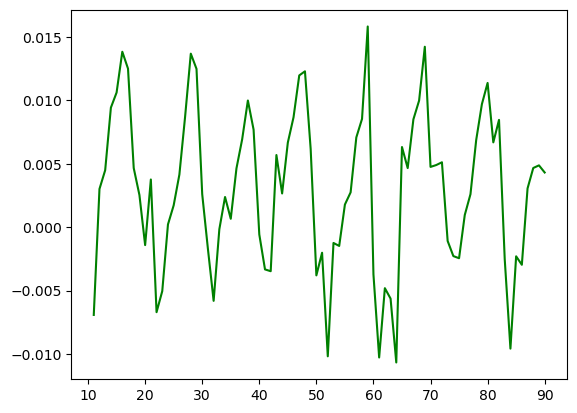

In [59]:
differencing.plot(color='green')

In [54]:
moving_avg.dropna(inplace=True)
ad_test(moving_avg)

1. ADF :  -0.3844717741455828
2. P-Value :  0.9126593296632668
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 67
5. Critical Values :
	 1% :  -3.5319549603840894
	 5% :  -2.905755128523123
	 10% :  -2.5903569458676765


In [55]:
differencing = ts_log - moving_avg
differencing.dropna(inplace=True)
differencing.head(5)

11   -0.006925
12    0.003017
13    0.004496
14    0.009434
15    0.010627
Name: mean, dtype: float64

In [56]:
ad_test(differencing)

1. ADF :  -6.04605484866091
2. P-Value :  1.3110748402531932e-07
3. Num Of Lags :  6
4. Num Of Observations Used For ADF Regression: 73
5. Critical Values :
	 1% :  -3.5232835753964475
	 5% :  -2.902030597326081
	 10% :  -2.5883710883843123


In [71]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [72]:
stepwise_fit = auto_arima(ts_log, trace= True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-659.979, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-667.979, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-665.981, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-665.981, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-668.958, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-663.979, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.436 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 335.479
Date:                Mon, 17 Apr 2023   AIC                           -668.958
Time:                        23:31:30   BIC                           -666.458
Sample:                             0   HQIC                          -667.950
                                 - 91                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.383e-05   4.02e-06      8.424      0.000     2.6e-05    4.17e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.77
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.27   Skew:                            -0.59
Prob(H) (two-sided):                  0.51   Kurtosis:                         4.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
train = ts_log.iloc[:-30]
test = ts_log.iloc[-30:]
print(train.shape,test.shape)

(61,) (30,)


In [98]:
from statsmodels.tsa.arima.model import ARIMA
from numpy.linalg import LinAlgError

In [103]:
history = [x for x in train]
predictions = list()
#test.reset_index()

In [104]:
for t in range(len(test)):
    try:
        model = ARIMA(history, order=(4,1,2))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    except (ValueError, LinAlgError):
        pass
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
rmse = mean_squared_error(test, predictions)**0.5
print('Test MSE: %.3f' % rmse)

predicted=6.011817, expected=6.005125
predicted=5.999687, expected=6.010684
predicted=6.017182, expected=6.009749
predicted=6.015559, expected=6.004892
predicted=6.006788, expected=6.022748
predicted=6.022149, expected=6.021805
predicted=6.023918, expected=6.026453
predicted=6.023429, expected=6.028796
predicted=6.024965, expected=6.033915
predicted=6.030385, expected=6.024338
predicted=6.021504, expected=6.023662
predicted=6.022485, expected=6.024874
predicted=6.024718, expected=6.019896
predicted=6.020039, expected=6.019432
predicted=6.019223, expected=6.020127
predicted=6.021181, expected=6.025235
predicted=6.026145, expected=6.027253
predicted=6.027153, expected=6.032404
predicted=6.030871, expected=6.036038
predicted=6.036038, expected=6.038525
predicted=6.036819, expected=6.033825
predicted=6.033825, expected=6.036624
predicted=6.036624, expected=6.025813
predicted=6.025340, expected=6.018197
predicted=6.018197, expected=6.025989
predicted=6.025989, expected=6.025856
predicted=6.

In [105]:
from math import sqrt
rms = sqrt(mean_squared_error(test, predictions))

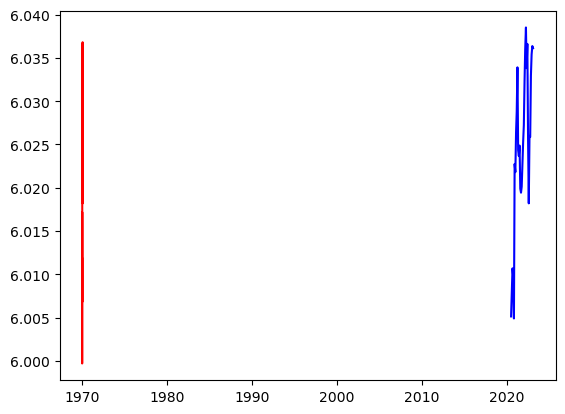

In [115]:
from matplotlib import pyplot
# plot
pyplot.plot(test, color = 'blue', label='test')   
pyplot.plot(predictions, color='red', label='pred')
pyplot.show()

# Significance testing

In [11]:
import pandas as pd
from scipy import stats

# Load the data
data = df

# Get a list of the unique months in the data
months = data['Months'].dt.month.unique()

# Loop through each month and perform Welch's t-test for 7 years of data
for month in months:
    # Get the summary statistics for this month for each year
    year_data = []
    for year in range(2014, 2023):
        year_month_data = data[(data['year'] == year) & (data['Months'].dt.month == month)]
        if not year_month_data.empty:
            year_mean = year_month_data.iloc[0]['mean']
            year_std = year_month_data.iloc[0]['stddev']
            year_nobs = year_month_data.iloc[0]['pixelcount']
            year_data.append((year_mean, year_std, year_nobs))
    
    # Only perform the t-test if we have data for at least two years
    if len(year_data) >= 2:
        # Perform Welch's t-test on the two values
        t, p = stats.ttest_ind_from_stats(year_data[0][0], year_data[0][1], year_data[0][2],
                                          year_data[1][0], year_data[1][1], year_data[1][2],
                                          equal_var=False)
        
        # Loop through remaining years to perform the test
        for i in range(1, len(year_data) - 1):
            t, p = stats.ttest_ind_from_stats(year_data[i][0], year_data[i][1], year_data[i][2],
                                              year_data[i+1][0], year_data[i+1][1], year_data[i+1][2],
                                              equal_var=False)
            # Print the results
            if p < 0.05:
                print('Significant difference found for {} {}: p-value = {}'.format(month, 2014+i, p))
            else:
                print('No significant difference found for {} {}: p-value = {}'.format(month, 2014+i, p))

Significant difference found for 11 2015: p-value = 3.555591656577781e-60
Significant difference found for 11 2016: p-value = 3.3262528230013316e-62
Significant difference found for 11 2017: p-value = 1.333785701896283e-34
Significant difference found for 11 2018: p-value = 0.0
Significant difference found for 12 2015: p-value = 5.6292416195197465e-52
Significant difference found for 12 2016: p-value = 2.925608114220099e-56
Significant difference found for 12 2017: p-value = 3.969946117998078e-149
Significant difference found for 12 2018: p-value = 0.0033987709692306967
Significant difference found for 12 2019: p-value = 3.19932789169064e-102
Significant difference found for 12 2020: p-value = 2.7160693415868416e-17
Significant difference found for 12 2021: p-value = 0.0
Significant difference found for 1 2015: p-value = 1.2782673182176495e-260
Significant difference found for 1 2016: p-value = 4.2140858386591696e-213
Significant difference found for 1 2017: p-value = 0.0
Significant d